#**SECTION 3: COMPARING AIRLINES**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pyspark.sql import SparkSession

# Start a Spark session
spark = SparkSession.builder.appName("CleanedData").getOrCreate()

# Path to the CSV file
file_path = "/content/drive/My Drive/cleaned.csv"

# Load the CSV as a Spark DataFrame
cleaned_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the first few rows
cleaned_df.show()


+----+-----+---+-----------+----+-------------+-----------+--------------+-------------------+-------------------+-------------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-------------------+-------------------+-------------+--------+---------+-------------------+----------------+------------------+----------------+-------------------+----------------+-----------------+--------------------+--------------+------------+--------------+---------------+----------------+------------------------+-----------------+-----------------+-------------------+--------------------+---------------------+----------+
|YEAR|MONTH|DAY|DAY_OF_WEEK|AIRL|FLIGHT_NUMBER|TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|     DEPARTURE_TIME|DEPARTURE_DELAY|TAXI_OUT|WHEELS_OFF|SCHEDULED_TIME|ELAPSED_TIME|AIR_TIME|DISTANCE|WHEELS_ON|TAXI_IN|  SCHEDULED_ARRIVAL|       ARRIVAL_TIME|ARRIVAL_DELAY|DIVERTED|CANCELLED|CANCELLATION_REASON|AIR_S

#**PART 1: Data Preparation:**


The goal is to analyze flight delays for different airlines. We want to figure out how often and how long flights are delayed. The data includes the airline code (like AA for American Airlines) and the departure delay time in minutes. Only delays between 15 and 180 minutes are considered because shorter delays are not significant, and longer ones are extreme.

**Steps**  
- First, the data is filtered to include only delays in the 15 to 180-minute range.  
- Then, the data is grouped by airline so we can calculate statistics for each one.  
- For each airline, we look at:  
   **Count**: Number of delayed flights.  
   **Average Delay**: The average delay time.  
   **Maximum Delay**: The longest delay.  
   **Minimum Delay**: The shortest delay (always 15 minutes due to filtering).  
- Finally, a table is created to compare these statistics across airlines.

**Formulas**  
Count: \[ {Count} = {Total flights delayed} \]  
Average Delay: \[ \{Average Delay} = {\{Sum of all delays}{Number of delayed flights}} \]  
Maximum Delay: \[ {Maximum Delay} = {All delay times}) \]  
Minimum Delay: \[ {Minimum Delay} = 15 \]  

**Example**  
Here are the results for three sample airlines:  
- **AA**: 4 delays, average delay 65 minutes, max delay 180 minutes, min delay 15 minutes.  
- **DL**: 3 delays, average delay 33.3 minutes, max delay 60 minutes, min delay 15 minutes.  
- **WN**: 3 delays, average delay 31.7 minutes, max delay 50 minutes, min delay 15 minutes.  

| Airline | Total Delays | Average Delay | Longest Delay | Shortest Delay |  
|---------|--------------|---------------|---------------|----------------|  
| AA      | 4            | 65.0          | 180           | 15             |  
| DL      | 3            | 33.3          | 60            | 15             |  
| WN      | 3            | 31.7          | 50            | 15             |  

**Insights**  
- Airlines with higher average delays are less punctual.  
- More frequent delays (higher counts) may indicate operational issues.  
- These stats allow passengers to pick better airlines and help airlines improve.  




In [4]:
# Install libraries to ensure everything is set up properly
!pip install pandas matplotlib

# Import libraries to handle data and create visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool  # For faster processing with multiple cores

# Mount Google Drive to access the uploaded dataset
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset (replace the path with your file's location in Google Drive)
file_path = '/content/drive/My Drive/cleaned.csv'
data = pd.read_csv(file_path)

# Step 1: Check if the necessary columns exist in the dataset
# We need the columns 'AIRL' (Airline) and 'DEPARTURE_DELAY' (Delay in minutes)
assert 'AIRL' in data.columns and 'DEPARTURE_DELAY' in data.columns, "Columns 'AIRL' and 'DEPARTURE_DELAY' are required."

# Step 2: Filter the data for delays between 15 and 180 minutes
# We are only interested in moderate to long delays, so we exclude smaller ones
filtered_data = data[(data['DEPARTURE_DELAY'] >= 15) & (data['DEPARTURE_DELAY'] <= 180)]

# Step 3: Define a function to calculate delay statistics for each airline
# This function takes one airline's data and calculates:
# - Total number of delays
# - Average delay
# - Maximum delay
# - Minimum delay
def calculate_stats(airline_group):
    # airline_group is a tuple: (airline_name, group_data)
    airline, delays = airline_group
    delays_list = delays['DEPARTURE_DELAY'].tolist()  # Get the list of delays
    return {
        'airline': airline,                   # The airline name
        'count': len(delays_list),            # Total number of delays
        'avg_delay': np.mean(delays_list),    # Average delay
        'max_delay': np.max(delays_list),     # Longest delay
        'min_delay': np.min(delays_list)      # Shortest delay (minimum is 15 due to filtering)
    }

# Step 4: Group the filtered data by airline
# This creates smaller datasets for each airline, ready for analysis
airline_groups = list(filtered_data.groupby('AIRL'))

# Step 5: Use multiple CPU cores to process the data faster
# Each airline's data is analyzed in parallel, speeding up the process
with Pool(processes=4) as pool:  # Adjust "processes" based on your machine's cores
    results = pool.map(calculate_stats, airline_groups)

# Step 6: Convert the results into a table (DataFrame) for easy analysis
results_df = pd.DataFrame(results)

# Step 7: Display the results
# This shows the delay statistics for each airline
print("Delay statistics for each airline:")
print(results_df)





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Delay statistics for each airline:
   airline  count  avg_delay  max_delay  min_delay
0       AA  10585  48.270855      180.0       15.0
1       AS   2200  49.219091      180.0       15.0
2       B6   6312  52.698669      180.0       15.0
3       DL  11064  47.399403      180.0       15.0
4       EV  11218  53.277768      180.0       15.0
5       F9   2267  56.350243      180.0       15.0
6       HA    776  36.257732      174.0       15.0
7       MQ  10018  54.011080      180.0       15.0
8       NK   2736  53.153143      179.0       15.0
9       OO  12669  56.999369      180.0       15.0
10      UA  11998  47.432322      180.0       15.0
11      US   5937  47.990736      180.0       15.0
12      VX   1014  53.601578      180.0       15.0
13      WN  26117  43.548646      180.0       15.0


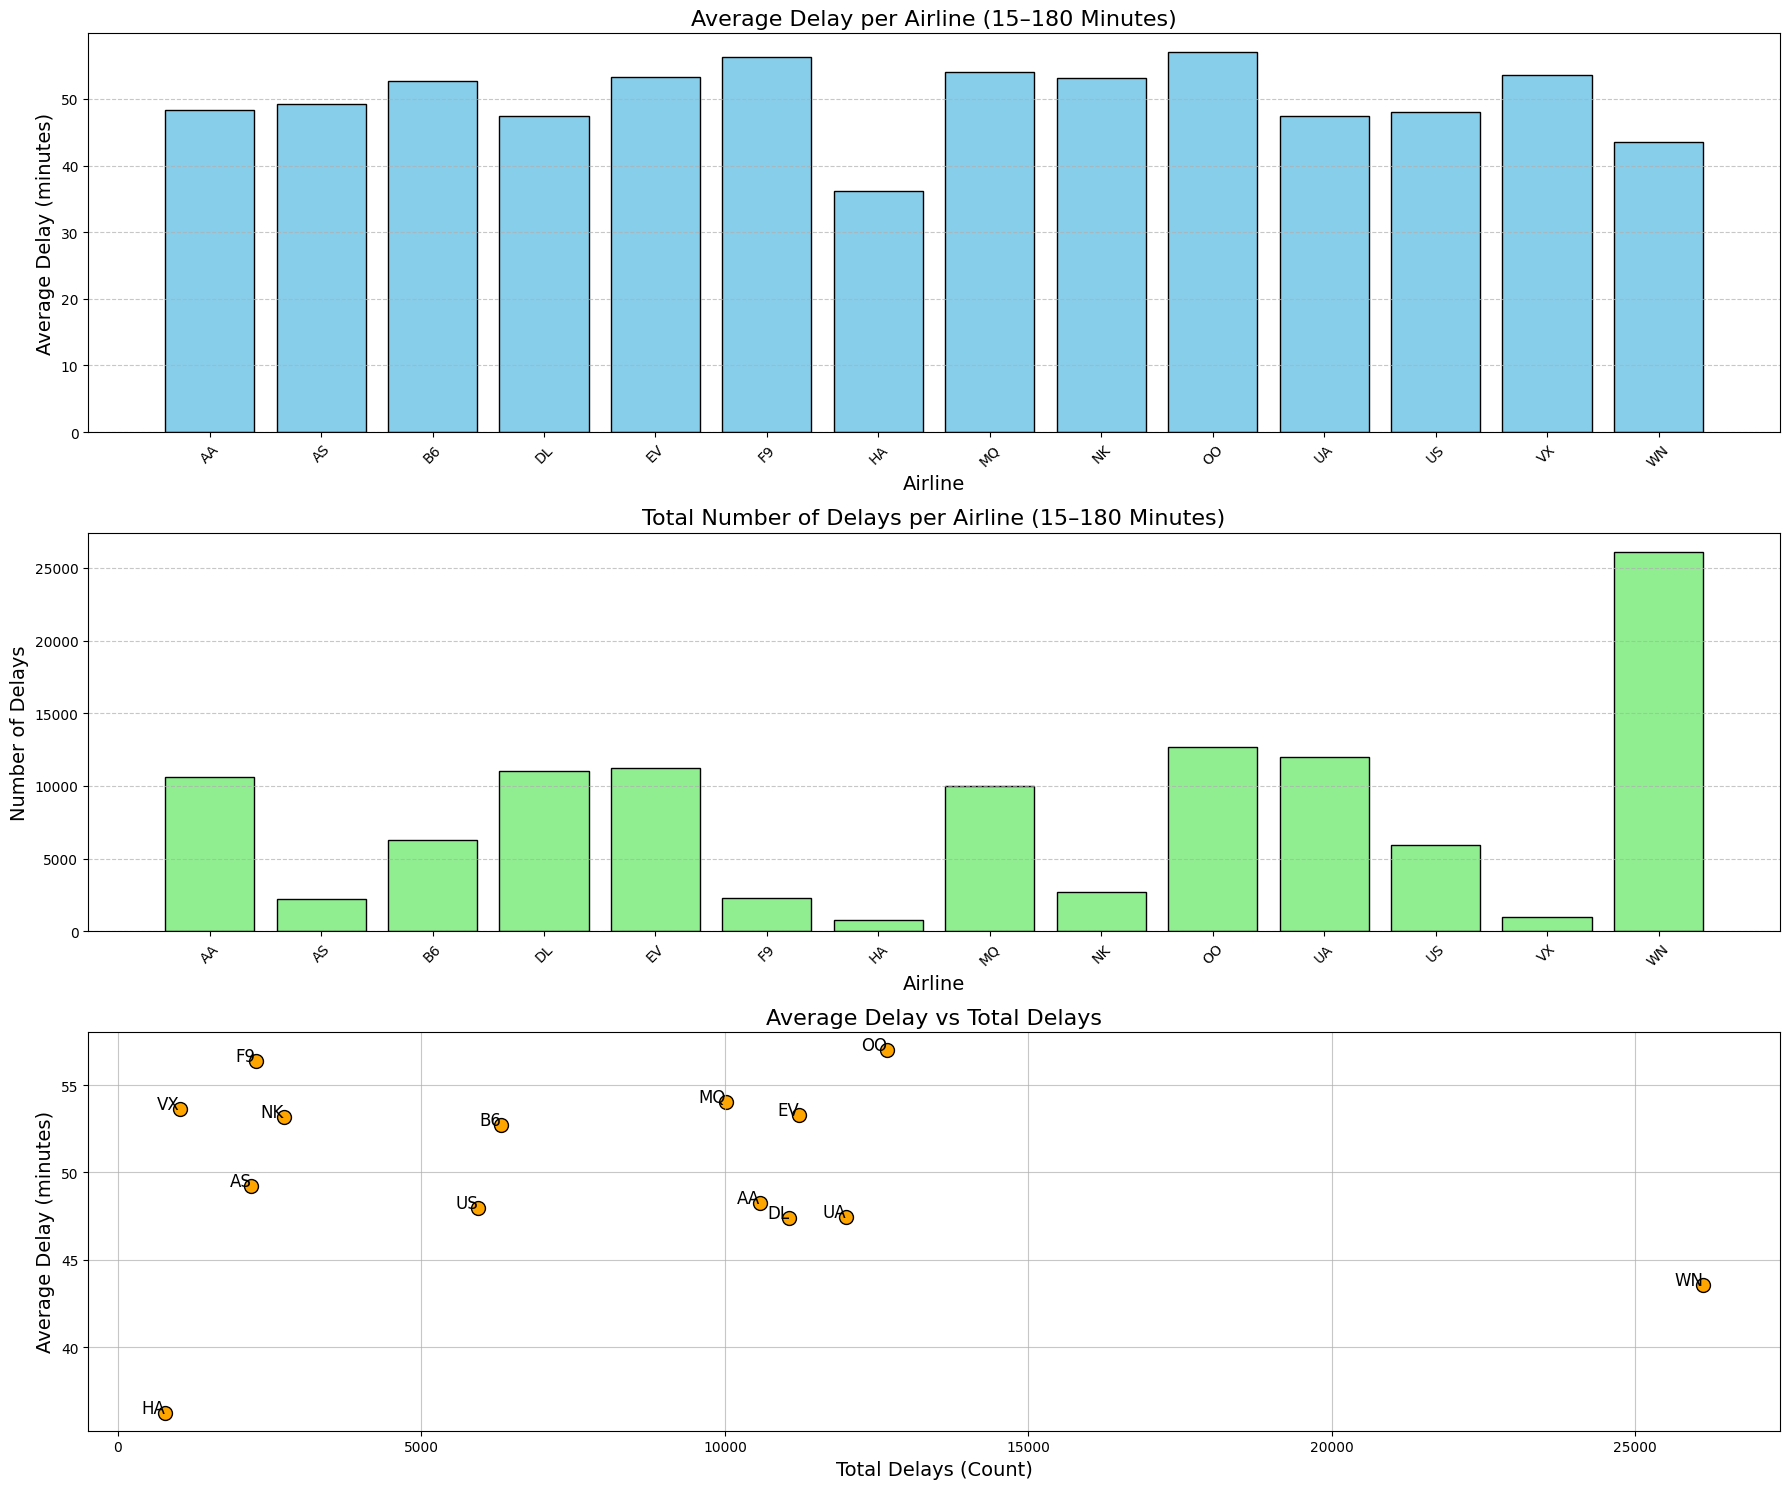

In [5]:
import matplotlib.pyplot as plt

# Set the figure size and layout
plt.figure(figsize=(18, 15))

# Bar Chart for Average Delays
plt.subplot(3, 1, 1)  # 3 rows, 1 column, position 1
plt.bar(results_df['airline'], results_df['avg_delay'], color='skyblue', edgecolor='black')
plt.title('Average Delay per Airline (15–180 Minutes)', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Average Delay (minutes)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Bar Chart for Total Delays (Count)
plt.subplot(3, 1, 2)  # 3 rows, 1 column, position 2
plt.bar(results_df['airline'], results_df['count'], color='lightgreen', edgecolor='black')
plt.title('Total Number of Delays per Airline (15–180 Minutes)', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Number of Delays', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Scatter Plot of Average Delay vs Total Delays
plt.subplot(3, 1, 3)  # 3 rows, 1 column, position 3
plt.scatter(results_df['count'], results_df['avg_delay'], color='orange', edgecolor='black', s=100)
plt.title('Average Delay vs Total Delays', fontsize=16)
plt.xlabel('Total Delays (Count)', fontsize=14)
plt.ylabel('Average Delay (minutes)', fontsize=14)
for i, airline in enumerate(results_df['airline']):
    plt.text(results_df['count'][i], results_df['avg_delay'][i], airline, fontsize=12, ha='right')
plt.grid(alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display all plots
plt.show()


#**PART 2: Modeling and Visualising Delay Distribution:**



The goal is to analyze flight delays for different airlines and fit their delay distributions using an exponential model. We aim to understand how often and how long flights are delayed, and we fit the data to extract meaningful parameters (\(a\) and \(b\)) for each airline.

The data includes:
- **Airline Code (`AIRL`)**: A short code representing the airline (e.g., AA for American Airlines).
- **Departure Delay (`DEPARTURE_DELAY`)**: The delay time in minutes for each flight.

**Steps**
1. First, the data is **filtered** to only include delays between **15 and 180 minutes** (Already showcased in Part 1) :
   
    Delays shorter than 15 minutes are insignificant.
   
   Delays longer than 180 minutes are treated as extreme cases.
2. The data is then **grouped by airline**, so that we can fit the delay distribution for each one.
3. For each airline, we fit the delay data using an **exponential function**:
   
    **Function**: \( f(x) = a*e^{-x/b} \)
   
    **Parameters**:
     - \(a\): Scale factor (related to the height of the curve).
     - \(b\): Decay rate (indicates how quickly delays reduce over time).
     - \(x\): Delay time (in minutes).
4. Finally, a table is created showing the fitted parameters \(a\) and \(b\), along with visualizations comparing delay distributions across airlines.

---

# **Exponential Fitting Code**
The code below:
- Fits an exponential curve to the delay data for each airline.
- Uses `multiprocessing` for parallel processing to speed up the calculations.
- Visualizes the delay distributions and fitted exponential curves for each airline.





Fitted Parameters for Each Airline:
   Airline         a          b
0       AA  0.061293  26.573977
1       AS  0.068889  24.063542
2       B6  0.045783  32.685930
3       DL  0.087911  20.388247
4       EV  0.045463  32.697280
5       F9  0.042209  34.165328
6       HA  0.167909  14.854861
7       MQ  0.039071  37.384835
8       NK  0.048277  31.105629
9       OO  0.035877  39.462671
10      UA  0.077421  22.336438
11      US  0.068865  24.278586
12      VX  0.049458  30.425224
13      WN  0.085653  21.482874


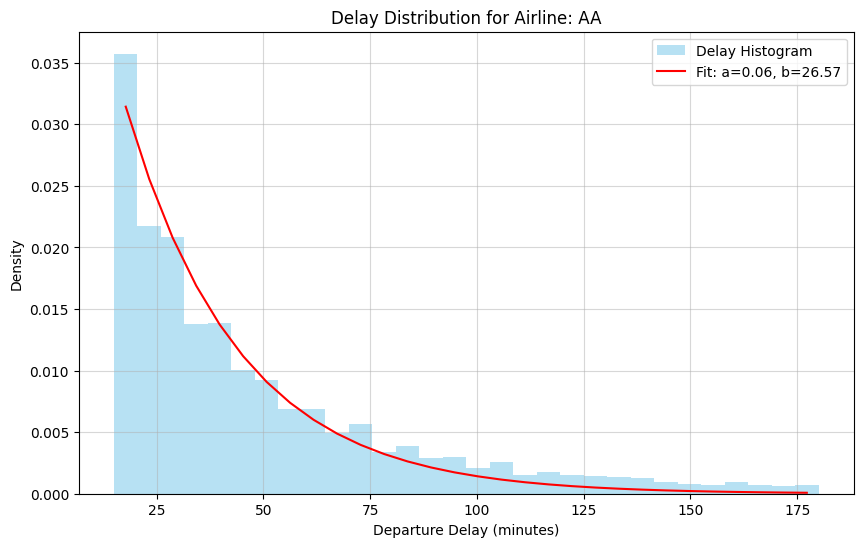

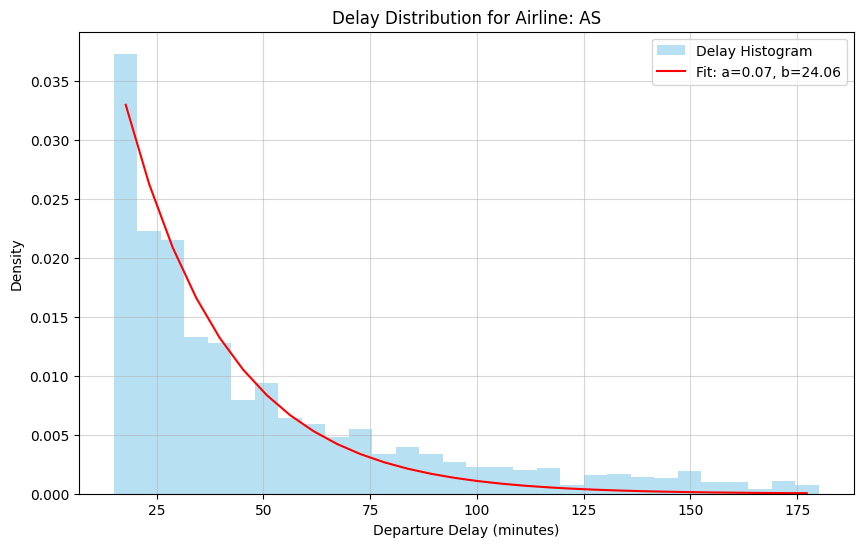

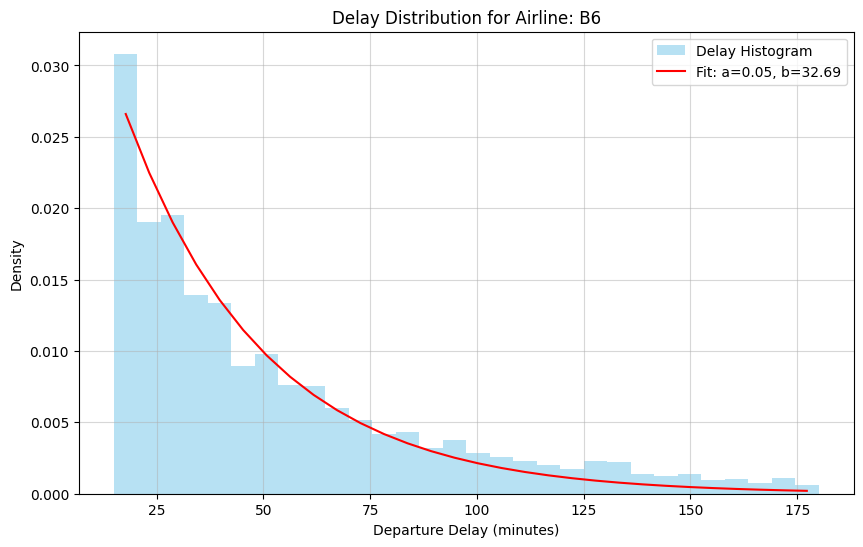

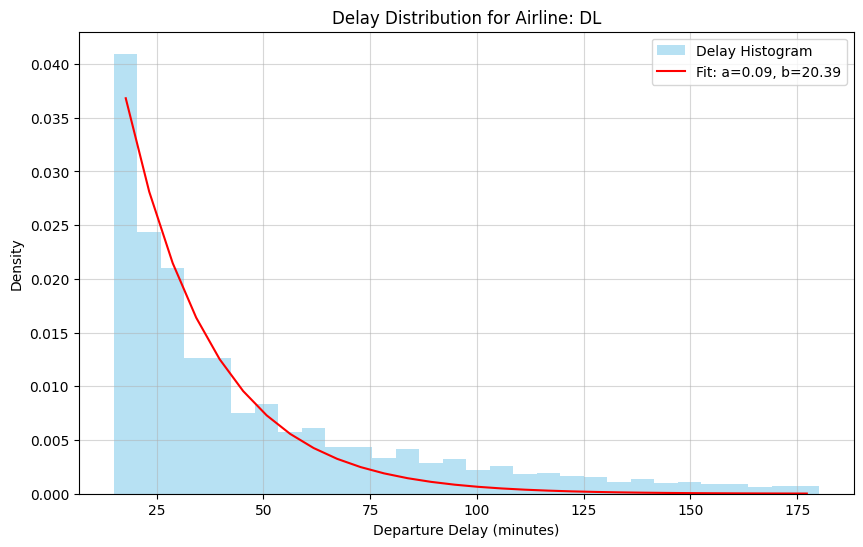

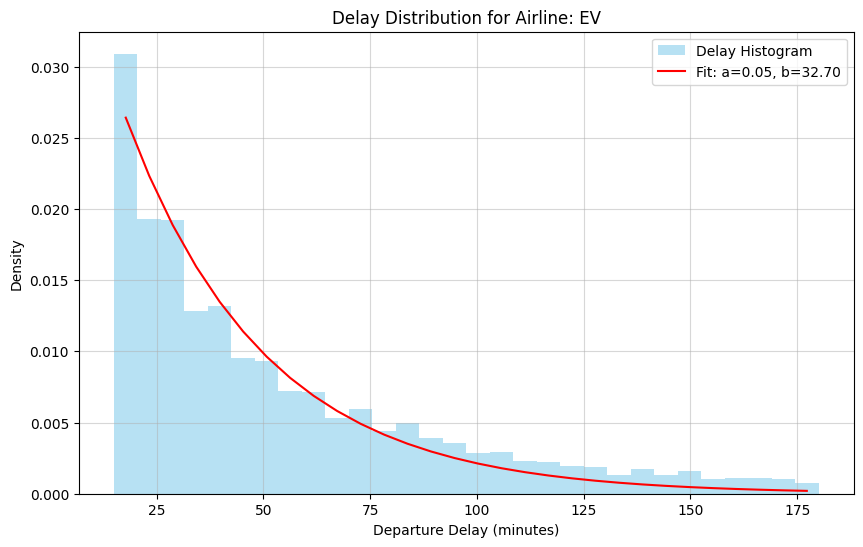

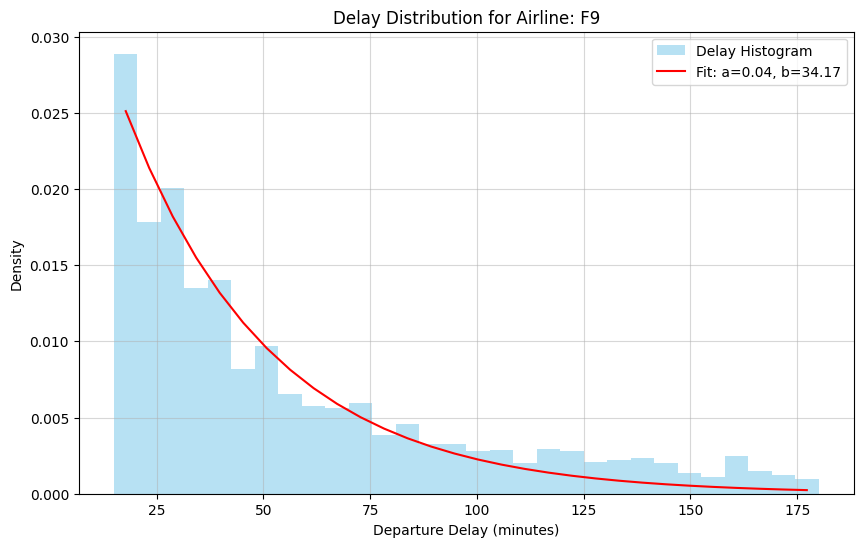

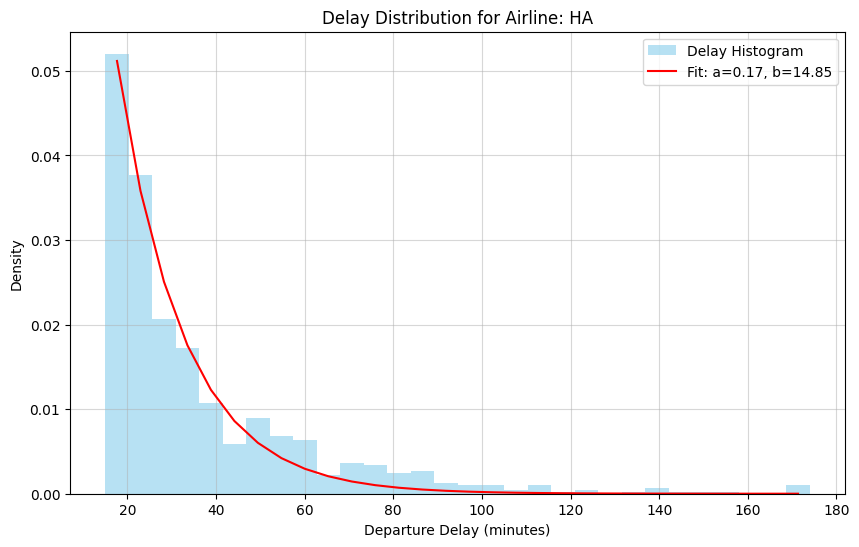

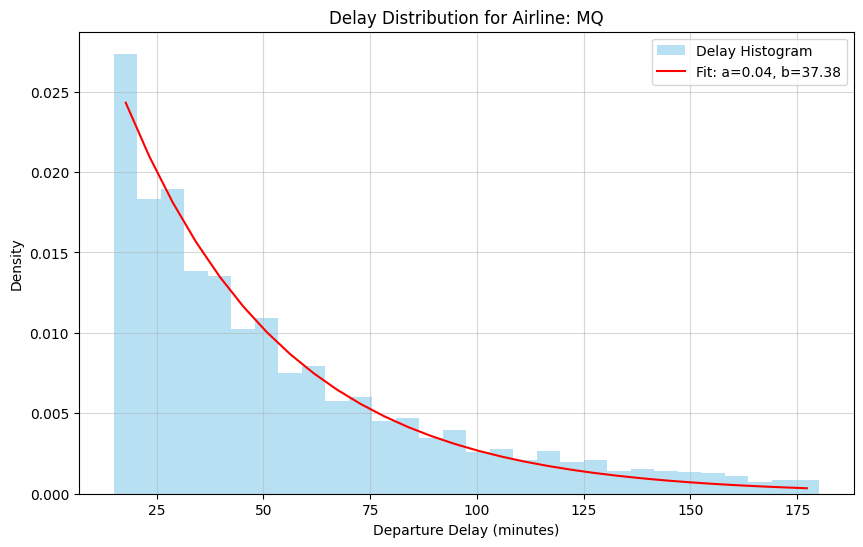

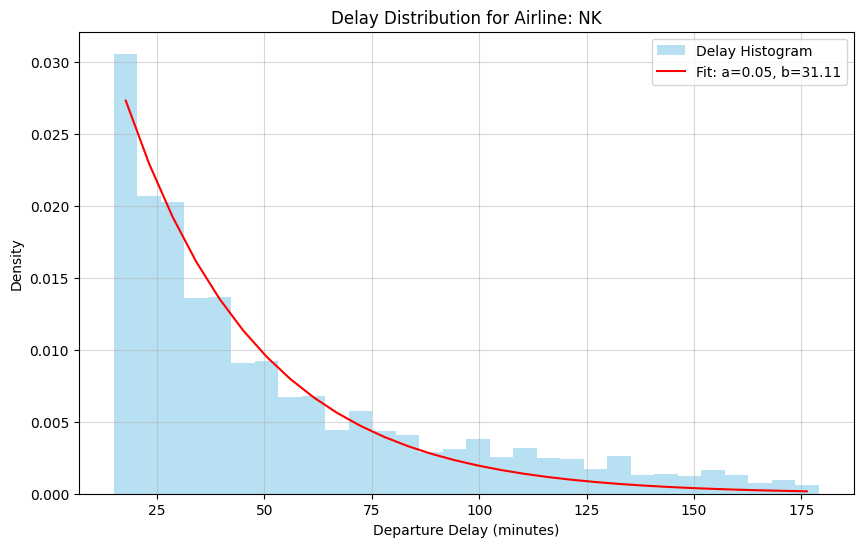

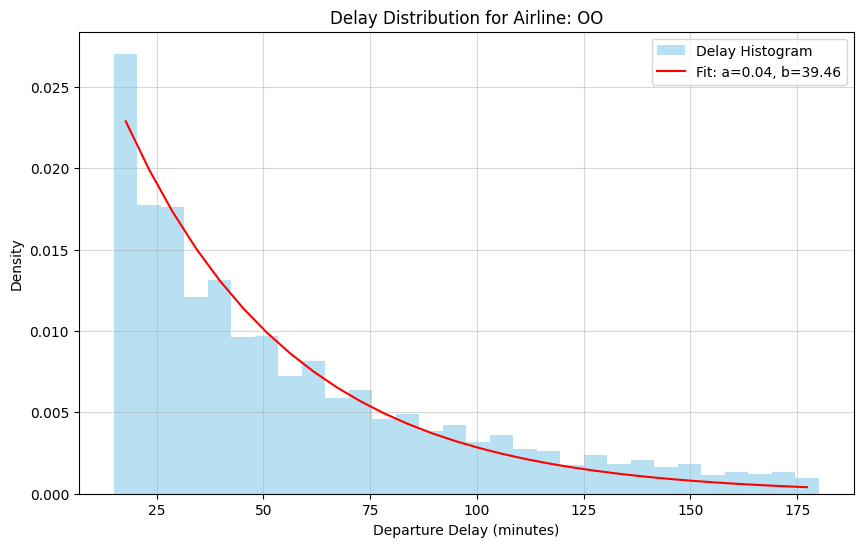

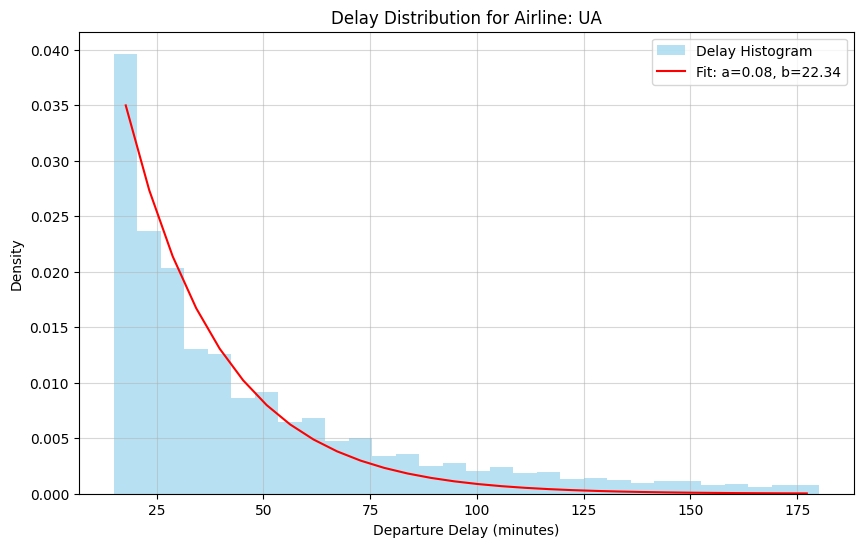

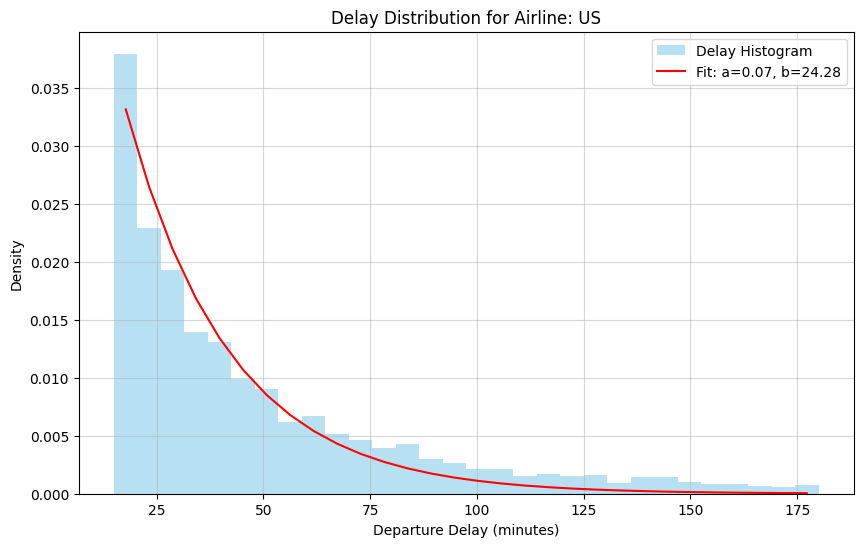

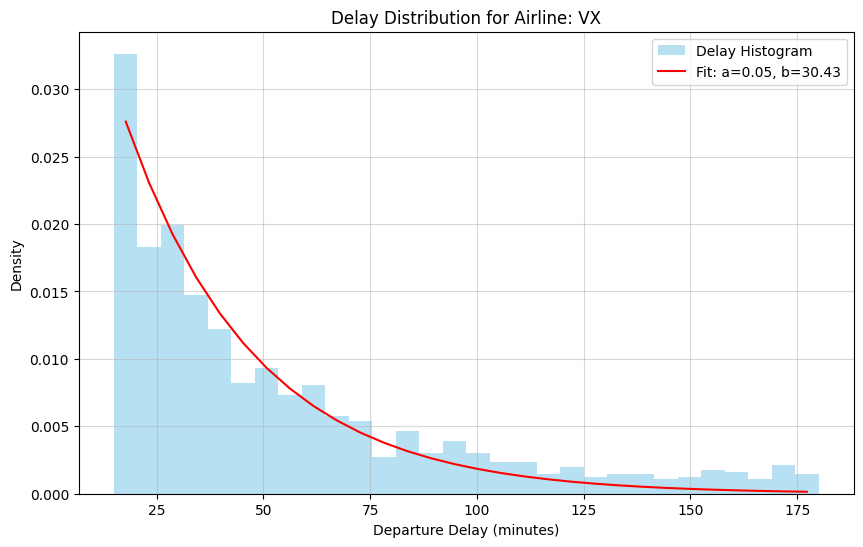

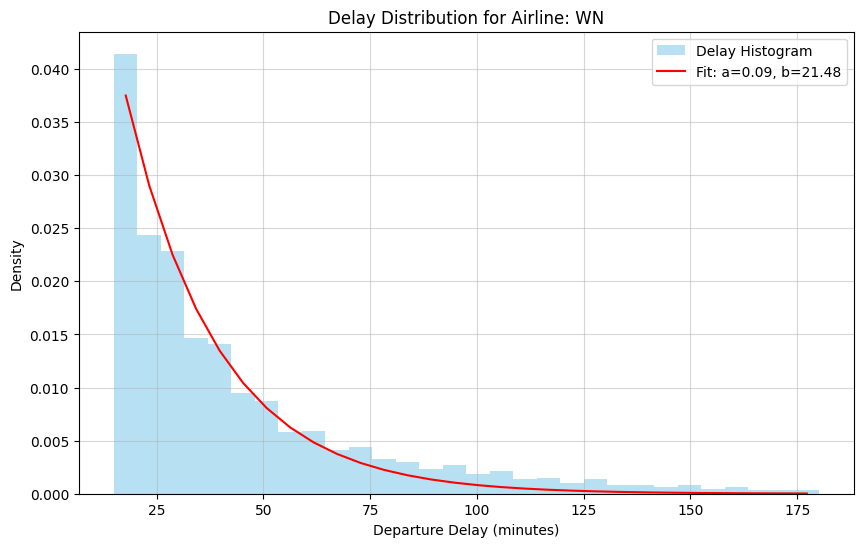

In [7]:

# Import required libraries
from multiprocessing import Pool
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/cleaned.csv'
data = pd.read_csv(file_path)

# Filter delays between 15 and 180 minutes
filtered_data = data[(data['DEPARTURE_DELAY'] >= 15) & (data['DEPARTURE_DELAY'] <= 180)]

# Define the exponential function
def exponential_function(x, a, b):
    return a * np.exp(-x / b)

# Define a worker function for MapReduce
def fit_airline_curve(airline_group):
    airline, group = airline_group
    delays = group['DEPARTURE_DELAY']
    hist, bin_edges = np.histogram(delays, bins=30, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

    try:
        # Fit the exponential curve
        popt, _ = curve_fit(exponential_function, bin_centers, hist, p0=(1, 30))
        return airline, popt[0], popt[1]  # Return airline and parameters a, b
    except RuntimeError:
        print(f"Could not fit data for airline {airline}")
        return airline, None, None

# Prepare data grouped by airline
airline_groups = list(filtered_data.groupby('AIRL'))

# Use multiprocessing for parallel processing
with Pool(processes=4) as pool:  # Adjust the number of processes as needed
    results = pool.map(fit_airline_curve, airline_groups)

# Collect results into a DataFrame
results_df = pd.DataFrame(results, columns=['Airline', 'a', 'b'])

# Display results
print("Fitted Parameters for Each Airline:")
print(results_df)

for airline, group in filtered_data.groupby('AIRL'):
    delays = group['DEPARTURE_DELAY']
    hist, bin_edges = np.histogram(delays, bins=30, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    params = results_df[results_df['Airline'] == airline].iloc[0]

    if not pd.isnull(params['a']) and not pd.isnull(params['b']):
        plt.figure(figsize=(10, 6))
        plt.hist(delays, bins=30, density=True, alpha=0.6, color='skyblue', label='Delay Histogram')
        plt.plot(bin_centers, exponential_function(bin_centers, params['a'], params['b']), 'r-',
                 label=f'Fit: a={params["a"]:.2f}, b={params["b"]:.2f}')
        plt.title(f'Delay Distribution for Airline: {airline}')
        plt.xlabel('Departure Delay (minutes)')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(alpha=0.5)
        plt.show()




#**PART 3: Ranking Airlines:**


## **Objective**
- Visualize the relationship between \(a\) (punctuality) and \(b\) (spread of delays) parameters for airlines.
- Rank airlines based on punctuality and provide insights into delay behaviors.

---

## **Visualization Features**

1. **Main Scatter Plot**:
   
    **X-axis**: \(b\) (Decay Rate) — Measures how spread out delays are.
   
    **Y-axis**: \(a\) (Scale Factor) — Reflects punctuality (higher \(a\) indicates better on-time performance).
   
    **Color-Coding**: Airlines are color-coded based on their rank (higher rank = better punctuality).
   
   **Annotations**: Each airline is labeled next to its corresponding point.

2. **Trend Arrow**:
   
   A red arrow indicates the direction of "Increasing Delays" (lower \(a\), higher \(b\)).

3. **Zoomed Inset**:
  
   Focuses on airlines with smaller \(b\) (less spread) and higher \(a\) (better punctuality).
   
   Provides a closer inspection of specific airlines and connects back to the main plot with dotted lines.

4. **Ranked Table**:
   
   Displays the airlines ranked by their \(a\) values (higher \(a\) = better punctuality).

5. **Color Bar**:
   
   Represents the rank of airlines, making it easy to identify top performers.

---

## **Key Insights**

- Airlines with **higher \(a\)** values have better punctuality and fewer significant delays.
- Airlines with **higher \(b\)** values experience more spread-out delays, indicating potential inefficiencies.
- The scatter plot and zoomed inset allow for an intuitive comparison of airlines.

---

## **Why This Matters**

1. **For Passengers**:
   
   Helps identify airlines that are more reliable and have better on-time performance.
2. **For Airlines**:
   
   Provides insights into operational inefficiencies and highlights areas for improvement.

---

## **Example Ranked Table**
| **Rank** | **Airline**                 | **\(a\)** | **\(b\)** |
|----------|-----------------------------|-----------|-----------|
| 1        | Airline A                   | 0.120     | 22.5      |
| 2        | Airline B                   | 0.110     | 24.0      |
| 3        | Airline C                   | 0.095     | 26.3      |
| ...      | ...                         | ...       | ...       |

---

## **Expected Output**
- **Scatter Plot**:
  
  A visual representation of \(a\) vs. \(b\) for all airlines.
  
   Annotated airline labels, trend arrow, and zoomed inset.
- **Table**:
  
  A ranked list of airlines based on their punctuality (\(a\)).

---




Ranked Airlines Based on Punctuality (a values):
Airline        a         b  Rank
     HA 0.167909 14.854861     1
     DL 0.087911 20.388247     2
     WN 0.085653 21.482874     3
     UA 0.077421 22.336438     4
     AS 0.068889 24.063542     5
     US 0.068865 24.278586     6
     AA 0.061293 26.573977     7
     VX 0.049458 30.425224     8
     NK 0.048277 31.105629     9
     B6 0.045783 32.685930    10
     EV 0.045463 32.697280    11
     F9 0.042209 34.165328    12
     MQ 0.039071 37.384835    13
     OO 0.035877 39.462671    14


<ipython-input-12-e88e8cf41d64>:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.title('Airline Delay Characteristics: a (Punctuality) vs. b (Spread)', fontsize=16, bbox={'facecolor': 'navy', 'pad': 5, 'color': 'white'})


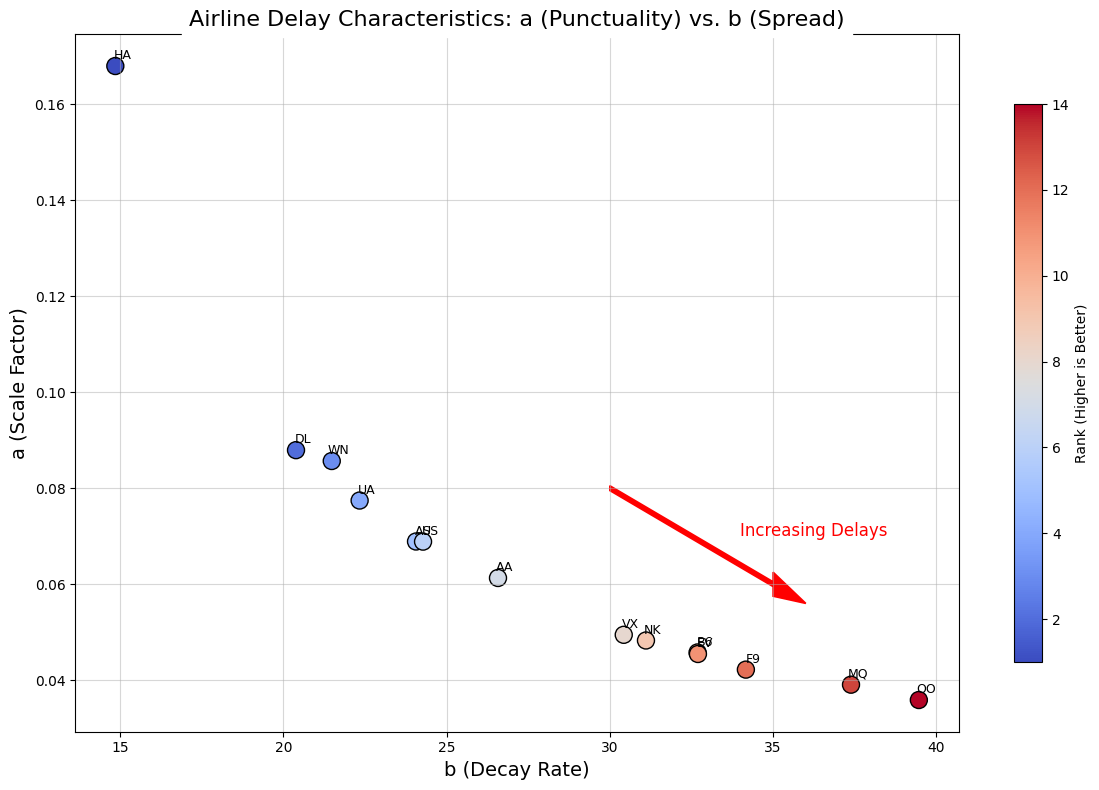

In [12]:
import matplotlib.pyplot as plt

# Rank airlines based on 'a' (punctuality)
results_df['Rank'] = results_df['a'].rank(ascending=False, method='min').astype(int)

# Print ranked results
print("\nRanked Airlines Based on Punctuality (a values):")
print(results_df.sort_values('Rank').to_string(index=False))

# Proceed with visualization
plt.figure(figsize=(12, 8))

# Scatter plot
sc = plt.scatter(results_df['b'], results_df['a'], c=results_df['Rank'], cmap='coolwarm', s=150, edgecolor='black')

# Annotate airlines
for i, row in results_df.iterrows():
    plt.annotate(row['Airline'], (row['b'], row['a']), textcoords="offset points", xytext=(5, 5), ha='center', fontsize=9)

# Add arrow and text for increasing delays
plt.arrow(30, 0.08, 5, -0.02, head_width=0.005, head_length=1, fc='red', ec='red', linewidth=1.2)
plt.text(34, 0.07, 'Increasing Delays', fontsize=12, color='red')

# Customize labels, grid, and title
plt.title('Airline Delay Characteristics: a (Punctuality) vs. b (Spread)', fontsize=16, bbox={'facecolor': 'navy', 'pad': 5, 'color': 'white'})
plt.xlabel('b (Decay Rate)', fontsize=14)
plt.ylabel('a (Scale Factor)', fontsize=14)
plt.colorbar(sc, label='Rank (Higher is Better)', shrink=0.8)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

